In [1]:
# Importing the libraries required
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
#Loading the dataset for analysis
df=pd.read_csv("metadata.csv")

In [3]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               372 non-null    int64  
 1   offset                  276 non-null    float64
 2   sex                     329 non-null    object 
 3   age                     318 non-null    float64
 4   finding                 372 non-null    object 
 5   survival                116 non-null    object 
 6   intubated               72 non-null     object 
 7   intubation_present      77 non-null     object 
 8   went_icu                35 non-null     object 
 9   in_icu                  7 non-null      object 
 10  needed_supplemental_O2  12 non-null     object 
 11  extubated               23 non-null     object 
 12  temperature             35 non-null     float64
 13  pO2_saturation          44 non-null     float64
 14  leukocyte_count         11 non-null     fl

In [5]:
df.isnull().sum()

patientid                   0
offset                     96
sex                        43
age                        54
finding                     0
survival                  256
intubated                 300
intubation_present        295
went_icu                  337
in_icu                    365
needed_supplemental_O2    360
extubated                 349
temperature               337
pO2_saturation            328
leukocyte_count           361
neutrophil_count          370
lymphocyte_count          362
view                        0
modality                    0
date                       81
location                  118
folder                      0
filename                    0
doi                       268
url                         0
license                   166
clinical_notes             10
other_notes               138
Unnamed: 28               368
dtype: int64

<Axes: >

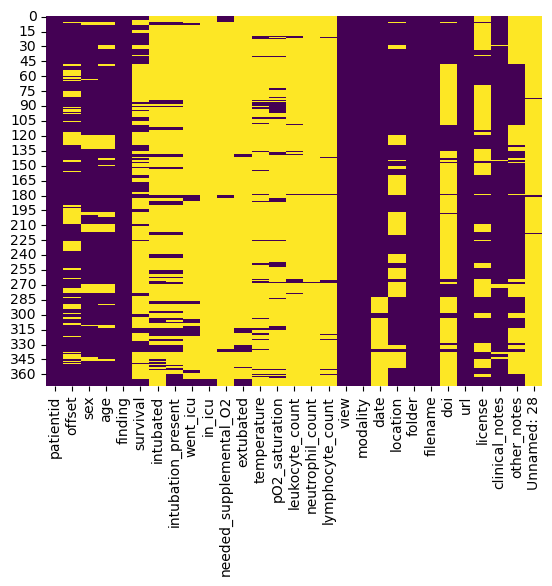

In [6]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')


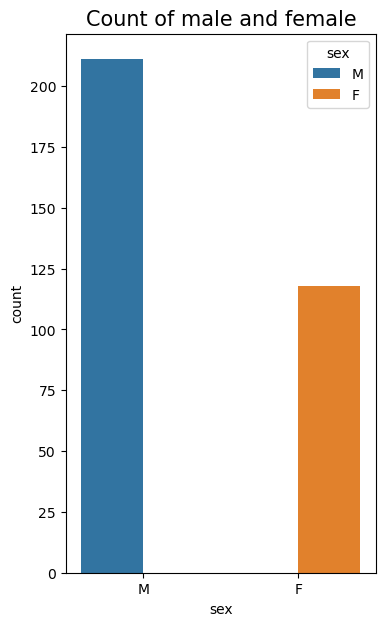

In [13]:
#Plot for the count of male and female.
plt.figure(figsize=(4,7))
sns.countplot(x='sex', hue='sex', data=df)

plt.title('Count of male and female', size=15)
plt.show()

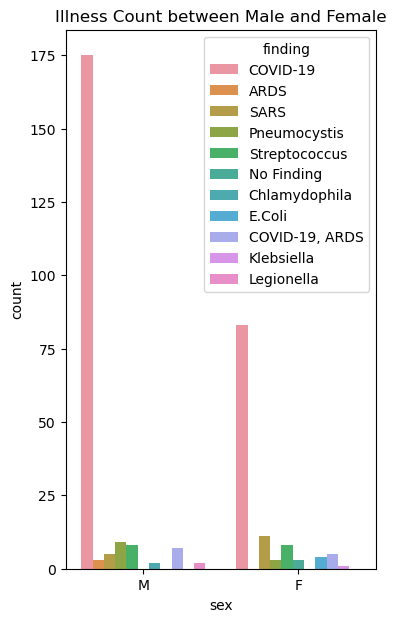

In [14]:
# Plot for finding count for male and female
plt.figure(figsize=(4,7))
sns.countplot(x='sex', hue='finding', data=df)

plt.title('finding Count between Male and Female')
plt.show()

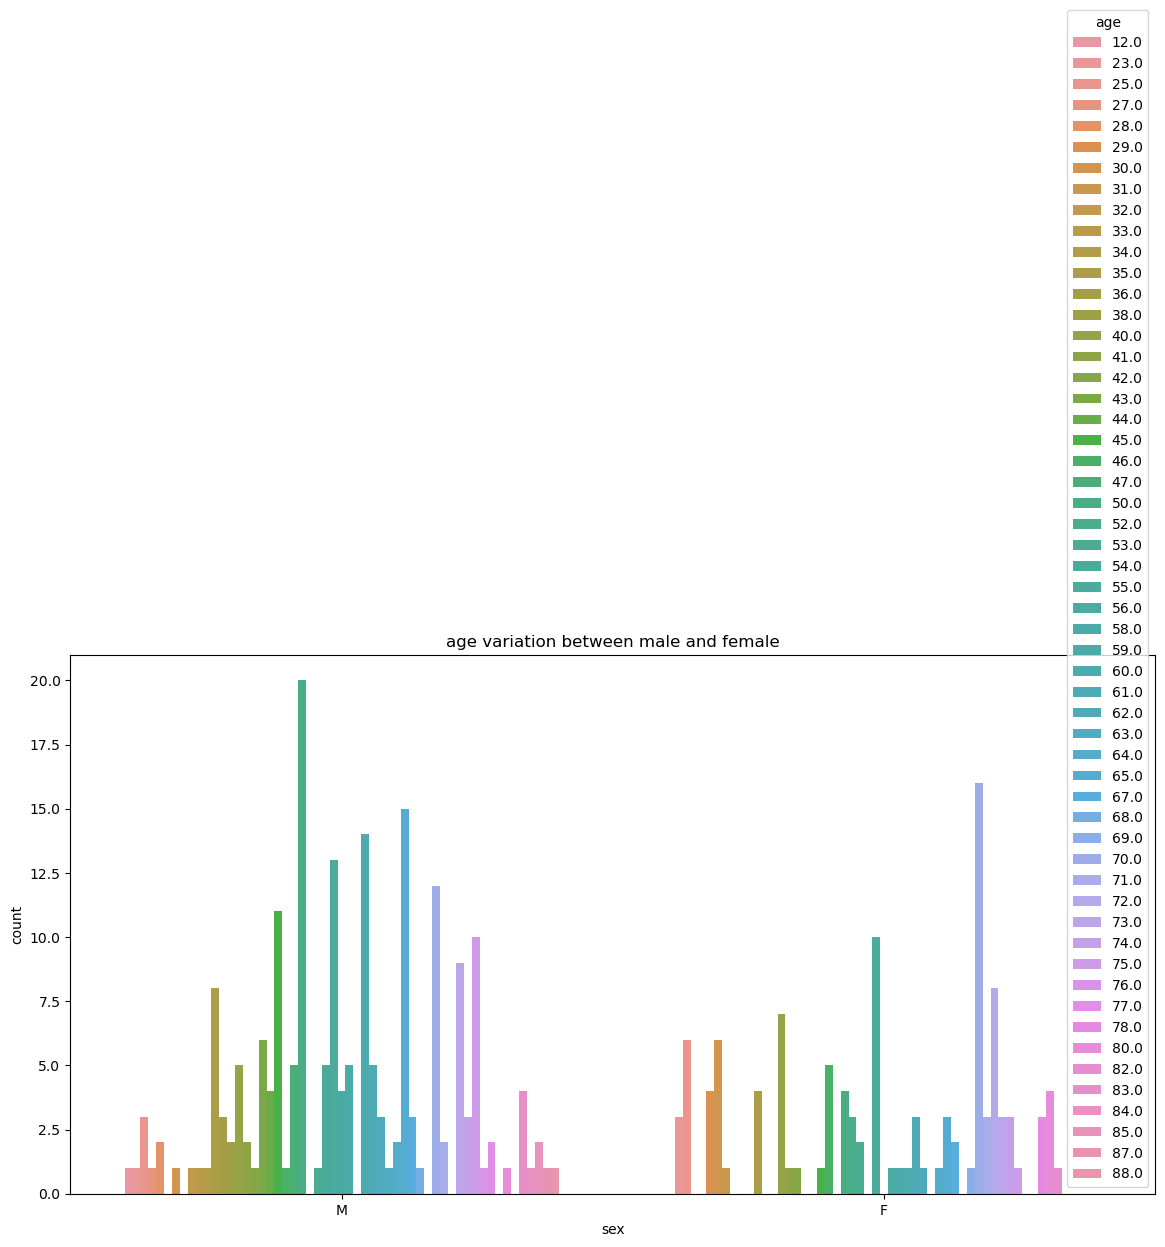

In [15]:
#Plot for age variation between male and female
plt.figure(figsize=(14,7))
sns.countplot(x='sex', hue='age', data=df)

plt.title('age variation between male and female')
plt.show()

In [16]:
df.groupby(['sex','survival']).mean()

C:\Users\91939\AppData\Local\Temp\ipykernel_15444\4152667385.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['sex','survival']).mean()


patientid     offset        age  temperature  pO2_saturation  \
sex survival                                                                  
F   N         116.928571   9.700000  66.642857        38.00       73.333333   
    Y          72.325000  10.175000  50.526316        37.84       95.600000   
M   N         109.153846   8.000000  53.461538        39.00             NaN   
    Y          79.790698   8.069767  54.534884        38.68       93.000000   

              leukocyte_count  neutrophil_count  lymphocyte_count  
sex survival                                                       
F   N                     NaN               NaN               NaN  
    Y                    3.13              1.63               1.2  
M   N                    0.22               NaN               NaN  
    Y                    7.16               NaN               0.9